In [2]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import time
import csv

from random import randint

/home/yoooda/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [42]:
#problem size

problem_size=40
# Initialize backpack parameters here so all algo's use the same problems
weights = {}
values = {}

weights[problem_size] = np.random.rand(problem_size)
values[problem_size] = np.random.rand(problem_size)

max_weight_pct = 0.6
function = mlrose.Knapsack(weights[problem_size], values[problem_size], max_weight_pct)
problem_fit = mlrose.DiscreteOpt(length = problem_size, fitness_fn = function, maximize = True)


seed=randint(1, 100)

start=time.time()

best_state, best_fitness, curve1 = mlrose.genetic_alg(problem_fit, \
                                    mutation_prob = 0.1,\
                                    max_attempts = 500, \
                                    pop_size=200,\
                                    max_iters= 1000, curve=True, random_state=seed)

end=time.time()
time1=end-start

start=time.time()

best_state, best_fitness, curve2 = mlrose.simulated_annealing(problem_fit,\
                                    max_attempts = 500, \
                                    max_iters=1000,\
                                    curve=True, \
                                    schedule=mlrose.GeomDecay(init_temp=0.20),\
                                    random_state=seed)

end=time.time()
time2=end-start
 

start=time.time()
best_state, best_fitness, curve3 = mlrose.random_hill_climb(problem_fit, \
                                    restarts=0,\
                                    max_attempts = 500, \
                                    max_iters=1000, curve=True, random_state=seed)


end=time.time()
time3=end-start

start=time.time()

best_state, best_fitness, curve4 = mlrose.mimic(problem_fit, \
                                    keep_pct=0.2,\
                                    max_attempts = 10000, \
                                    max_iters=1000, curve=True, random_state=seed)
end=time.time()
time4=end-start

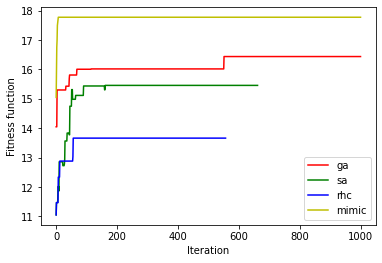

In [48]:
## fitness vs iteration 
plt.plot(curve1,'r')
plt.plot(curve2,'g')
plt.plot(curve3,'b')
plt.plot(curve4,'y')
plt.legend(["ga","sa","rhc","mimic"],loc='lower right')
plt.xlabel("Iteration")
plt.ylabel("Fitness function")
plt.show()

In [44]:
def change_index(arr,time):
    res=[]
    for i,v in enumerate(arr):
        res.append([i*time/(len(arr)-1)*100,v])
        
    return np.array(res)

In [45]:
curve1s=change_index(curve1,time1)
curve2s=change_index(curve2,time2)
curve3s=change_index(curve3,time3)
curve4s=change_index(curve4,time4)

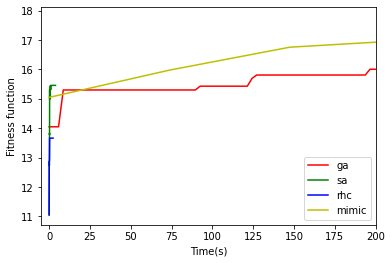

In [47]:
#### plot fitness vs optimization time 
plt.plot(curve1s[:,0],curve1s[:,1],'r')
plt.plot(curve2s[:,0],curve2s[:,1],'g')
plt.plot(curve3s[:,0],curve3s[:,1],'b')
plt.plot(curve4s[:,0],curve4s[:,1],'y')
plt.legend(["ga","sa","rhc","mimic"],loc='lower right')
plt.xlim([-5,200])
#plt.ylim([0,200])
plt.xlabel("Time(s)")
plt.ylabel("Fitness function")

plt.show()

In [10]:
TRAINING_ITERATIONS = [10*i for i in range(20)]
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
function = mlrose.Knapsack(weights, values, max_weight_pct)
problem_fit = mlrose.DiscreteOpt(length = 5, fitness_fn = function, maximize = True, max_val = 5)


for itrial in range(4):
    iterdata = []

    for iteration in TRAINING_ITERATIONS:
        seed=randint(1, 100)
        start=time.time()
        best_state, best_fitness, curve = mlrose.genetic_alg(problem_fit, \
                                            mutation_prob = 0.1,\
                                            max_attempts = 500, \
                                            pop_size=200,\
                                            max_iters= iteration, curve=True, random_state=seed)
        end=time.time()
        ga_time=end-start
        ga_fit=best_fitness
            
        start=time.time()
        best_state, best_fitness, curve = mlrose.simulated_annealing(problem_fit,\
                                            max_attempts = 500, \
                                            max_iters=iteration,\
                                            curve=True, \
                                            schedule=mlrose.GeomDecay(init_temp=0.20),\
                                            random_state=seed)
        end=time.time()
        sa_time=end-start
        sa_fit=best_fitness
        
        start=time.time()
        best_state, best_fitness, curve = mlrose.random_hill_climb(problem_fit, \
                                            restarts=0,\
                                            max_attempts = 500, \
                                            max_iters=iteration, curve=True, random_state=seed)
        
        end=time.time()
        rhc_time=end-start
        rhc_fit=best_fitness

        start=time.time()
        best_state, best_fitness, curve = mlrose.mimic(problem_fit, \
                                            keep_pct=0.2,\
                                            max_attempts = 500, \
                                            max_iters=iteration, curve=True, random_state=seed)
        end=time.time()
        mimic_time=end-start
        mimic_fit=best_fitness
        iterdata.append([iteration,ga_fit,ga_time,sa_fit,sa_time,rhc_fit,rhc_time,mimic_fit,mimic_time])
        
    with open("knapsack_{}.csv".format(str(itrial)),'w') as resultFile:
        wr = csv.writer(resultFile, dialect='excel')
        wr.writerow(['iteration','ga_fit','ga_time','sa_fit','sa_time','rhc_fit','rhc_time','mimic_fit','mimic_time'])
        wr.writerows(iterdata) 